In [1]:
import os
from PIL import Image
import numpy as np
import csv


In [2]:

def process_tif_images(directory, output_csv):
    # List to store the data for each image
    data = []
    
    # Loop through all the .tif files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".tif"):
            image_path = os.path.join(directory, filename)
            
            # Open the image using PIL
            image = Image.open(image_path).convert("L")  # Convert image to grayscale
            
            # Convert the image to a NumPy array
            img_array = np.array(image)
            print(img_array)

            # break
            # Count the number of black (0) and white (255) pixels
            num_black_pixels = np.sum(img_array == 0)
            num_white_pixels = np.sum(img_array == 1)
            total_pixels = img_array.size
            
            # Calculate the ratio of white pixels to total pixels
            white_ratio = num_white_pixels / total_pixels
            
            # Store the results in the data list
            data.append([filename, num_black_pixels, num_white_pixels, white_ratio, total_pixels])
    
    # Write the data to a CSV file
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write the header
        writer.writerow(["Image", "Black Pixels", "White Pixels", "White Pixel Ratio", "Total Pixels"])
        # Write the data rows
        writer.writerows(data)

# Specify the directory containing the tif files and the output CSV file path


In [3]:
directory_path = '.\\GEE_Masks\\GEE_resized\\train_gee'
output_csv_path = 'results.csv'

process_tif_images(directory_path, output_csv_path)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

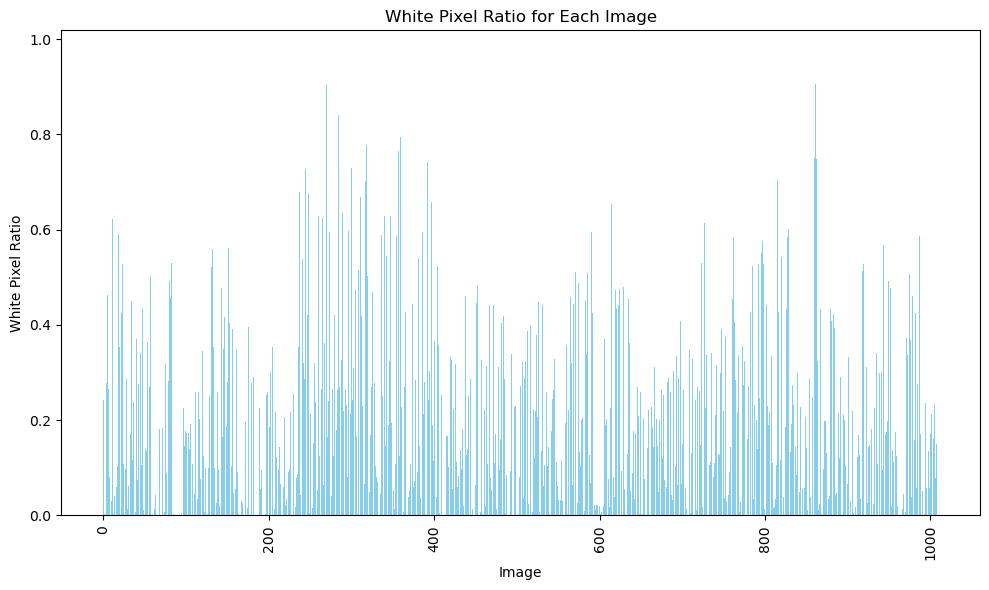

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
csv_file = 'results.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file)

# Plotting the white pixel ratio for each image
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['White Pixel Ratio'], color='skyblue')

# Add titles and labels
plt.title('White Pixel Ratio for Each Image')
plt.xlabel('Image')
plt.ylabel('White Pixel Ratio')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.savefig("WhitePixelRatio.png", bbox_inches="tight")
plt.show()

In [5]:
# df_small = df[df['White Pixel                                                                                                                                                                                                                                  Ratio']<=0.2]
# df_small.to_csv("Small_Images.csv", index=False)

In [6]:
# df_medium = df[(df['White Pixel Ratio'] > 0.2) & (df['White Pixel Ratio'] <= 0.4)]
# # df[(df['White Pixel Ratio'] > 0.2) & (df['White Pixel Ratio'] <= 0.4)].shape
# df_medium.to_csv("Medium_Images.csv", index=False)

In [7]:
# df_big =df[df['White Pixel Ratio']>0.4]
# df_big.to_csv("Big_Images.csv", index=False)